In [ ]:
!pip install sortedcontainers

# sample jkd family and projections



In [ ]:
# import numpy as np

# def project_to_subset(p, I):
#     """
#     Project the high-dimensional point p onto the subset of coordinates specified by I, ignoring NaN values.
#
#     Parameters:
#     p - High-dimensional point
#     I - Subset of coordinates
#
#     Returns:
#     Projected low-dimensional point; returns None if there are NaN values
#     """
#     projected = tuple(p[i] for i in I if not np.isnan(p[i]))
#     # If the length of the projection does not match the length of I, it means there are NaN values; return None
#     if len(projected) != len(I):
#         return None
#     return projected

# def build_projection_map(X, I):
#     """
#     Build a mapping from the low-dimensional space to the high-dimensional space, ignoring projections with NaN values.
#
#     Parameters:
#     X - Set of points in high-dimensional space (original dataset)
#     I - Subset of coordinates to retain
#
#     Returns:
#     Projection mapping dictionary: low-dimensional points as keys, corresponding high-dimensional points as values
#     """
#     projection_map = {}
#     for p in X:
#         p_I = project_to_subset(p, I)  # Get the projection of p onto I
#         # Only add to the map if p_I is not None
#         if p_I is not None:
#             projection_map[p_I] = p  # Use the projection as the key and the high-dimensional point as the value
#     return projection_map

# def inverse_map(Y, projection_map):
#     """
#     Compute the inverse mapping, mapping the set of points in the low-dimensional space back to the original high-dimensional space.
#
#     Parameters:
#     Y - Set of points in low-dimensional space
#     projection_map - Mapping dictionary from low-dimensional points to high-dimensional points
#
#     Returns:
#     Set of points in the original high-dimensional space (inverse mapping result)
#     """
#     high_dim_points = set()
#     for y in Y:
#         if y in projection_map:
#             high_dim_points.add(projection_map[y])
#     return high_dim_points

# # Example
# X = [
#     (1, 2, 3, 4),
#     (5, 6, 7, 8),
#     (9, 10, 11, 12)
# ]  # Set of points in the original high-dimensional space
# I = [0, 2]  # Choose a subset of coordinates, e.g., the 0th and 2nd coordinates

# # Build the projection map
# projection_map = build_projection_map(X, I)

# # Define the set of low-dimensional points Y (in the low-dimensional subspace)
# Y = {project_to_subset(p, I) for p in X}  # For example, project all points in X onto I to create the set of low-dimensional points Y

# # Compute the inverse mapping
# inverse_mapped_points = inverse_map(Y, projection_map)

# print("Set of low-dimensional points Y:", Y)
# print("Set of high-dimensional points mapped back:", inverse_mapped_points)

In [ ]:
# Create jkd family (Lemma A.8)

import numpy as np
import math

def create_jkd_family(j, k, d):
    # Calculate the number of set t
    t = int(((j + k) ** (j + k + 1)) / (math.factorial(j) * math.factorial(k)) * 2 * math.log(d))
    family = []
    print(t)

    # generate t elements
    for _ in range(t):
        random_set = set()
        for element in range(1, d + 1):
            if np.random.rand() < k / (j + k):
                random_set.add(element)
        family.append(random_set)

    return family

# test
j = 2
k = 3
d = 10
jkd_family = create_jkd_family(j, k, d)

# for i, subset in enumerate(jkd_family):
#     print(f"Set {i + 1}: {sorted(subset)}")

5996


# Dynamic Gonzalez's Alogirthm

## Algorithm 5

In [ ]:
import numpy as np
from sortedcontainers import SortedList
import random

class BalancedBinaryTree:
    def __init__(self):
        self.data = SortedList(key=lambda item: item[0])  # Sort by projection

    def add(self, projection, x):
        """Add a (projection, x) tuple to the balanced binary tree"""
        self.data.add((projection, x))

    def remove(self, projection, x):
        """Remove a (projection, x) tuple from the balanced binary tree"""
        if (projection, x) in self.data:
            self.data.remove((projection, x))

    def upper_bound(self, projection):
        """Find the largest (projection, x) tuple that does not exceed the given projection"""
        idx = self.data.bisect_right((projection, None)) - 1
        if idx >= 0:
            return self.data[idx]
        else:
            return None

    def lower_bound(self, projection):
        """Find the smallest (projection, x) tuple that is no less than the given projection"""
        idx = self.data.bisect_left((projection, None))
        if idx < len(self.data):
            return self.data[idx]
        else:
            return None

    def furthest(self, C):
        """Find the (projection, x) tuple that is furthest from set C"""
        if not C:
            # If C is empty, return the rightmost (maximum) element in data
            return self.data[-1] if self.data else None

        # If the length of C is 1, find the point furthest from the single element in C
        if len(C) == 1:
            single_point = C[0]
            # Traverse self.data to find the point furthest from single_point
            furthest_point = max(self.data, key=lambda item: abs(item[0] - single_point))
            return furthest_point

        # If the length of C is greater than 1, process by partitioning intervals
        C = sorted(C)
        furthest_points = []

        for i in range(len(C) - 1):
            mid_point = 0.5 * (C[i] + C[i + 1])
            furthest_points.append(self.upper_bound(-float('inf')))
            furthest_points.append(self.lower_bound(mid_point))

        furthest_points = [point for point in furthest_points if point is not None]
        # print(f"Furthest points (filtered) in furthest function: {furthest_points}")

        if furthest_points:
            furthest_point = max(furthest_points, key=lambda item: self.max_distance(item[0], C))
            return furthest_point
        else:
            return None

    @staticmethod
    def max_distance(projection, C):
        """Calculate the maximum distance between projection and all points in set C"""
        return max(abs(projection - c) for c in C)

    def get_random_node(self):
        """Randomly select and return a (projection, x) tuple"""
        if not self.data:
            return None
        random_index = np.random.randint(0, len(self.data))
        return self.data[random_index]

class DynamicGonzalez:
    def __init__(self, k, q, delta, m, seed=11):
        self.k = k
        self.q = q
        self.delta = delta
        self.m = m
        self.l = int(np.ceil(k * np.log(q) + np.log(1 / delta)))

        if seed is not None:
            np.random.seed(seed)
        # Initialize V and T_v
        self.V = [np.random.randn(m) for _ in range(self.l)]
        self.T = {tuple(v): BalancedBinaryTree() for v in self.V}

    def update(self, x):
        # Store the (projection, x) tuple in T_v
        for v in self.V:
            v_tuple = tuple(v)
            projection = np.dot(x, v)  # Calculate the projection of x onto v
            self.T[v_tuple].add(projection, x)  # Add the (projection, x) tuple
            # print(f"Added point {x} to T_v with projection {projection}")


    def get_coreset(self):
        # Compute the coreset
        Q = set()
        # Randomly select a key from T and get a random node
        random_key = random.choice(list(self.T.keys()))  # Randomly select a key
        random_point = self.T[random_key].get_random_node()  # Get a random node
        if random_point:  # Check if the random node exists
            Q.add(tuple(random_point[1]))  # Convert the original vector part of the random node to a tuple and add it to Q

        for i in range(self.k + 1):
            # print(list(Q))
            furthest_points = []
            print(f"i = {i}")  # Debug output

            for v in self.V:
                v_tuple = tuple(v)
                # Use the furthest point query on each T_v to find the point most distant from Q
                projections = [np.dot(x, v) for x in Q]

                # Find the point in T_v that is furthest from these projections
                if self.T[v_tuple].data:  # Ensure T_v is not empty
                    x_v = self.T[v_tuple].furthest(projections)
                    if x_v is not None:
                        furthest_points.append(x_v)

            # Debug output: print the furthest points found in this iteration
            # print(f"Furthest points in this iteration: {furthest_points}")

            # Select the point furthest from Q to add to Q
            if furthest_points:
                x_star = max(furthest_points, key=lambda x: self.distance_to_set(x[1], Q))
                # print(f"Adding point {x_star[1]} to Q")  # Debug output
                Q.add(tuple(x_star[1]))  # Convert x_star[1] to a tuple and add it to Q
            else:
                print("No furthest points found, exiting loop.")
                break
            print(f"Q: {Q}") # Debug output

        return Q

    @staticmethod
    def distance_to_set(x, Q):
        """
        Calculate the sum of squared Euclidean distances from vector x to all vectors in set Q

        Parameters:
        x - Vector (as a numpy array)
        Q - Set of vectors (a list containing multiple numpy arrays)

        Returns:
        Sum of squared distances
        """
        if not Q:
            raise ValueError("Set Q cannot be an empty set")
        return sum(np.linalg.norm(x - q) ** 2 for q in Q)

# Example
k = 5
q = 10
delta = 0.1
m = 3  # Assuming in 3-dimensional space

dg = DynamicGonzalez(k, q, delta, m)

# Assume some data points
data_points = [np.random.randn(m) for _ in range(20)]

# Update structure
for x in data_points:
    dg.update(x)
# print(dg.T)

# Get the coreset
coreset = dg.get_coreset()
print("Final Coreset:", coreset)
len(coreset)

i = 0
Q: {(-0.07174941217099023, 2.156674425806779, -0.8294372522768853), (-1.0616544037884463, -0.6844846684032199, -0.4762144798666495)}
i = 1
Q: {(-0.7135599294040993, -1.9082895416901746, 0.6873123485844095), (-0.07174941217099023, 2.156674425806779, -0.8294372522768853), (-1.0616544037884463, -0.6844846684032199, -0.4762144798666495)}
i = 2
Q: {(-1.8230095835236662, 0.8791137997169072, 1.8463648729317061), (-0.7135599294040993, -1.9082895416901746, 0.6873123485844095), (-0.07174941217099023, 2.156674425806779, -0.8294372522768853), (-1.0616544037884463, -0.6844846684032199, -0.4762144798666495)}
i = 3
Q: {(-1.8230095835236662, 0.8791137997169072, 1.8463648729317061), (-0.7135599294040993, -1.9082895416901746, 0.6873123485844095), (-0.07174941217099023, 2.156674425806779, -0.8294372522768853), (-1.0616544037884463, -0.6844846684032199, -0.4762144798666495)}
i = 4
Q: {(-1.8230095835236662, 0.8791137997169072, 1.8463648729317061), (-0.7135599294040993, -1.9082895416901746, 0.68731234

4

## Algorithm 4

In [ ]:
import numpy as np
import random

class DynamicGonzalez:
    def __init__(self, k, q, delta, m):
        self.k = k
        self.q = q
        self.delta = delta
        self.m = m
        self.l = int(np.ceil(k * np.log(q) + np.log(1 / delta)))

        # Initialize V and T_v
        self.V = [np.random.randn(m) for _ in range(self.l)]
        self.T = {tuple(v): BalancedBinaryTree() for v in self.V}

    def update(self, x):
        """Project point x onto each vector v and store the projection"""
        for v in self.V:
            v_tuple = tuple(v)
            projection = np.dot(x, v)
            self.T[v_tuple].add(projection, x)

    def get_coreset(self):
        """Get the coreset based on existing points"""
        Q = set()
        random_key = random.choice(list(self.T.keys()))
        random_point = self.T[random_key].get_random_node()
        # print(f"Random point: {random_point}")
        if random_point:
            Q.add(tuple(random_point[1]))

        for _ in range(self.k + 1):
            furthest_points = []
            for v in self.V:
                v_tuple = tuple(v)
                projections = [np.dot(x, v) for x in Q]

                if self.T[v_tuple].data:
                    x_v = self.T[v_tuple].furthest(projections)
                    if x_v is not None:
                        furthest_points.append(x_v)

            if furthest_points:
                x_star = max(furthest_points, key=lambda x: self.distance_to_set(x[1], Q))
                Q.add(tuple(x_star[1]))
            else:
                break
        # print(Q)

        return Q

    def remove(self, x, tol=1e-6):
        """Remove point x from the projection storage for each vector v, allowing a small tolerance"""
        for v in self.V:
            v_tuple = tuple(v)
            projection = np.dot(x, v)

            # 遍历 T[v_tuple] 中的数据，找到匹配的点，允许一定的误差范围
            to_remove = None
            for proj, stored_x in self.T[v_tuple].data:
                if abs(proj - projection) < tol and np.array_equal(stored_x, x):
                    to_remove = (proj, stored_x)
                    break

            # 如果找到了匹配的点，移除它
            if to_remove:
                self.T[v_tuple].remove(*to_remove)
                # print(f"Removed point {x} with projection {projection} (tolerance {tol}) from T[{v_tuple}]")
            # else:
                # print(f"Warning: Point {x} with projection {projection} not found in T[{v_tuple}] within tolerance {tol}")


    @staticmethod
    def distance_to_set(x, Q):
        """Calculate the sum of squared distances from x to all points in set Q"""
        return sum(np.linalg.norm(x - np.array(q)) ** 2 for q in Q)


class DynamicKCenterCoreset:
    def __init__(self, k, j, d):
        self.k = k
        self.j = j
        self.d = d
        self.I = [I for I in self.create_jkd_family(j, k, d) if len(I) > 0]
        self.DI = {I: DynamicGonzalez(k, q=10, delta=1/len(self.I), m=len(I)) for I in self.I}
        self.YI = {I: set() for I in self.I}

    def create_jkd_family(self, j, k, d):
        # Calculate the number of sets t
        t = int(0.02 * ((j + k) ** (j + k + 1)) / (math.factorial(j) * math.factorial(k)) * 2 * math.log(d))
        family = []
        print(t)

        # Generate t elements
        for _ in range(t):
            random_set = set()
            for element in range(0, d):
                if np.random.rand() < k / (j + k):
                    random_set.add(element)
            family.append(tuple(sorted(random_set)))  # Convert to tuple and sort for consistency

        return family

    # def init(self):
    #     """Initialize the structures of all D_I"""
    #     for I in self.I:
    #         self.DI[I].__init__(self.k, q=10, delta=1/len(self.I), m=len(I))
    #         self.YI[I] = set()

    def project_to_subset(self, p, I):
        """
        Project high-dimensional point p onto the subset of coordinates specified by I, ignoring NaN values.

        Parameters:
        p - High-dimensional point
        I - Subset of coordinates

        Returns:
        Projected low-dimensional point; returns None if there are NaN values
        """
        projected = tuple(p[i] for i in I if not np.isnan(p[i]))
        # If the length of the projection does not match the length of I, it means there are NaN values; return None
        if len(projected) != len(I):
            return None
        return projected

    def build_projection_map(self, X, I):
        """
        Build a mapping from the low-dimensional space to the high-dimensional space, ignoring projections with NaN values.

        Parameters:
        X - Set of points in high-dimensional space (original dataset)
        I - Subset of coordinates to retain

        Returns:
        Projection mapping dictionary: low-dimensional points as keys, corresponding high-dimensional points as values
        """
        projection_map = {}
        for p in X:
            p_I = self.project_to_subset(p, I)  # Get the projection of p onto I
            # Only add to the map if p_I is not None
            if p_I is not None:
                projection_map[tuple(p_I)] = tuple(p)  # Use the projection as the key and the high-dimensional point as the value
        return projection_map

    def inverse_map(self, Y, projection_map):
        """
        Compute the inverse mapping, mapping the set of points in the low-dimensional space back to the original high-dimensional space.

        Parameters:
        Y - Set of points in low-dimensional space
        projection_map - Mapping dictionary from low-dimensional points to high-dimensional points

        Returns:
        Set of points in the original high-dimensional space (inverse mapping result)
        """
        high_dim_points = set()
        for y in Y:
            if y in projection_map:
                high_dim_points.add(projection_map[y])
        return high_dim_points


    def update(self, X):
        """Update each D_I with the set of points X"""
        for I in self.I:
            projection_map = self.build_projection_map(X, I)  # Build the projection map
            X_I = set(projection_map.keys())
            for x_I in X_I:
                self.DI[I].update(x_I)  # Update D_I
            self.YI[I] = self.DI[I].get_coreset()  # Get the new coreset
            self.YI[I] = self.inverse_map(self.YI[I], projection_map)

    def remove(self, points_to_remove, X):
        """
        Remove the specified set of points from all D_I and Y_I.

        Parameters:
        points_to_remove - Set of high-dimensional points to remove
        """
        for I in self.I:
            # Build the projection map only for the points to be removed
            projection_map_remove = self.build_projection_map(points_to_remove, I)
            X_I_to_remove = set(projection_map_remove.keys())


            # Remove each projected point x_I from D_I
            for x_I in X_I_to_remove:
                self.DI[I].remove(x_I)  # Call the remove method in DynamicGonzalez

            projection_map = self.build_projection_map(X, I)

            self.YI[I] = self.DI[I].get_coreset()  # Get the new coreset
            # print(f"XI[{I}] = {self.YI[I]}")
            self.YI[I] = self.inverse_map(self.YI[I], projection_map)
            # print(f"YI[{I}] = {self.YI[I]}")


        # v = self.DI[I].V[0]
        # print(f"DI[{I}].V = {self.DI[I].V}")
        # print(f"v = {v}")
        # print(f"DI[{I}] = {self.DI[I].T[tuple(v)].data}")
        # print(f"YI[{I}] = {self.YI[I]}")

    # def remove(self, points_to_remove):
    #     """
    #     Remove the specified set of points from all D_I and Y_I.
    #     """
    #     for I in self.I:
    #         # Build the projection map only for the points to be removed
    #         projection_map = self.build_projection_map(points_to_remove, I)
    #         X_I_to_remove = set(projection_map.keys())

    #         print(f"Removing points for I={I}: {X_I_to_remove}")
    #         print(f"Before removal, size of DI[I]: {len(self.DI[I])}")

    #         # Check if there are points to remove
    #         if not X_I_to_remove:
    #             print(f"No points to remove for I={I}, skipping.")
    #             continue

    #         # Remove each projected point x_I from D_I
    #         for x_I in X_I_to_remove:
    #             if x_I in self.DI[I]:
    #                 self.DI[I].remove(x_I)
    #             else:
    #                 print(f"Point {x_I} not found in DI[I], skipping removal.")

    #         print(f"After removal, size of DI[I]: {len(self.DI[I])}")

    #         # Get the new coreset
    #         if len(self.DI[I]) > 0:
    #             self.YI[I] = self.DI[I].get_coreset()
    #             self.YI[I] = self.inverse_map(self.YI[I], projection_map)
    #         else:
    #             print(f"DI[I] is empty for I={I}, setting YI[I] to an empty set.")
    #             self.YI[I] = set()


    def get_coreset(self):
        """Get the final coreset"""
        coreset = set()
        for I in self.I:
            for y in self.YI[I]:
                coreset.add(y)
        return coreset


# # Example usage
# X = [np.random.rand(5) for _ in range(20)]  # Assume X is a set containing 20 5-dimensional vectors
# k = 3
# j = 2
# d = 5
# delta = 0.1

# dkcc = DynamicKCenterCoreset(k, j, d)
# # dkcc.init()  # Initialize all D_I

# # Update each point
# dkcc.update(X)

# # Get the coreset
# coreset = dkcc.get_coreset()
# print("Final coreset:", coreset)

## Algorithm 3

In [ ]:
import numpy as np

# Assuming the previously implemented DynamicKCenterCoreset class
# Omitting the previous implementation of the DynamicKCenterCoreset class

def efficient_importance_score_estimation(X, alpha, z, j, k, d):
    # Initialize the dynamic data structure D
    dynamic_kcenter = DynamicKCenterCoreset(j, k, d)

    # Insert each point in X into D
    dynamic_kcenter.update(X)

    # Initialize the importance scores dictionary
    importance_scores = {tuple(x): 0 for x in X}
    i = 1
    # print(X)
    X = [tuple(x) for x in X]

    # Calculate the coreset and assign scores
    while len(X) > 0:
        # Get the current coreset P
        P = dynamic_kcenter.get_coreset()
        print(P)

        P = {tuple(p) for p in P}
        # Assign scores to each point in P
        for x in P:
            importance_scores[tuple(x)] = alpha**z / i
            # print(importance_scores[tuple(x)])

        # Remove points in P from D
        X = [x for x in X if x not in P]

        dynamic_kcenter.remove(P, X)
        # print(X)

        # Increment the counter i
        i += 1
        print(i)
        # print(importance_scores)
        # if i >=5:
          # break

    return importance_scores

# 重新生成 200 个二维随机点
X = [np.random.randn(2) for _ in range(200)]

# 在前 50 个点中插入包含 (x, NaN) 的点
for i in range(20):
    X[i] = [X[i][0], np.nan]

# 在接下来的 50 个点中插入包含 (NaN, y) 的点
for i in range(20, 40):
    X[i] = [np.nan, X[i][1]]
alpha = 1.5
z = 2
j = 2
k = 3
d = 2

# Calculate importance scores
importance_scores = efficient_importance_score_estimation(X, alpha, z, j, k, d)
print("Importance Scores:", importance_scores)

36
{(-1.2560742035016212, -0.4983987303031993), (-0.5832252963816541, 0.3298716615966342), (-2.636331875784491, -0.5291046844282548), (0.8518198611703922, 0.21273694309407087), (-1.5288094123881937, -2.5359945975375693), (0.3915129558394448, 1.485432549053182), (0.372242906616251, 1.0713863497638758), (1.7197692494539971, -0.06717600565797147), (0.414580712163185, -1.0909559091809096), (0.06907004521264849, -0.22542849381199367), (0.24895139654305432, -0.42492515262763797)}
2
{(-1.2216630672458355, -2.4688228586765026), (1.5018591570199036, 1.0745968305136835), (-0.9696500046866048, 1.638575552635786), (-1.3783929828409367, 1.1205404969885986), (-0.45665930569981517, 1.7120330082208906), (0.575959680782062, -0.06862634549256681), (2.609195761479629, 1.3295845112986915), (1.6401282437617377, -0.31663703648334157), (-0.8990407823457341, -1.2982968629058707), (1.6189562174166956, -1.7250399892563653), (-0.7240867407277836, 0.7176021895567233)}
3
{(0.6512140255223245, 0.2730494920121051), 

[-0.692370221586862, -0.28490595114889317, -0.5585548767716747, -0.7463503428261129, 0.2890224944528784, -0.21475211331256935, -0.9042931391038591, 2.1761137819355887, -1.497777505316371, 0.8531767867760206, -0.5762603308314275, -1.2545423948543095, 0.013704210232187349, -1.3461186064260757, -1.9621240582058068, -1.3320656536376774, -0.06590249737654962, 0.9497431995753515, -0.8763645717726883, -1.0856979318064863, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.3394369988342306, -0.8922964941177086, 0.4682200191143444, -0.8583103118833753, 0.6512140255223245, -0.046720398223731176, -0.028439113260213977, 1.4158893084580335, 0.3613724908064548, -0.08389739660141932, 0.11594327749657181, -1.478295436341214, -0.19368505240162173, -0.05441034815767984, -0.7605897371742633, 0.662737788444211, -0.789957720270381, -0.5832252963816541, -1.1419632923540963, -1.3663428147122574, 1.0177583881179286, 0.005159896615640998, -0.6895583614626299, 

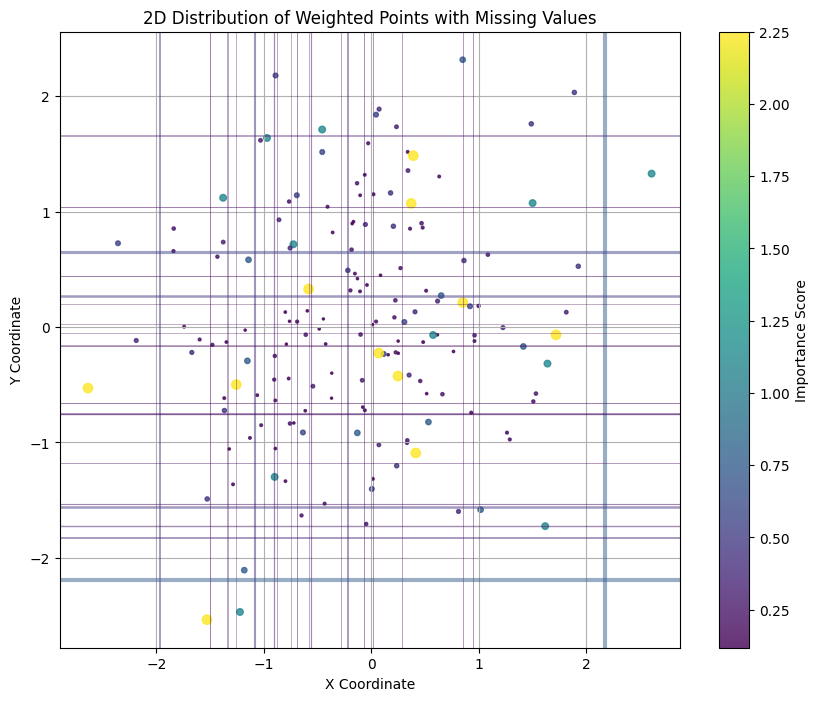

In [ ]:
import matplotlib.pyplot as plt

data = importance_scores
# print(data)
# 分离坐标和分数
x_coords = []
y_coords = []

for point in data.keys():
    if np.isnan(point[0]):
        x_coords.append(np.nan)
        y_coords.append(point[1])  # (NaN, y)
    elif np.isnan(point[1]):
        x_coords.append(point[0])  # (x, NaN)
        y_coords.append(np.nan)
    else:
        x_coords.append(point[0])
        y_coords.append(point[1])
print(x_coords)
print(y_coords)
scores = list(data.values())

# 使用 colormap 'viridis'
cmap = plt.cm.viridis
norm = plt.Normalize(min(scores), max(scores))

# 创建散点图
plt.figure(figsize=(10, 8))
for x, y, score in zip(x_coords, y_coords, scores):
    color = cmap(norm(score))  # 根据 score 映射颜色

    if np.isnan(y) and not np.isnan(x):
        # print(f"Drawing vertical line at x = {x}")
        plt.axvline(x, color=color, alpha=0.5, linewidth=score*4)
        # print(score)

    elif np.isnan(x) and not np.isnan(y):
        # print(f"Drawing horizontal line at y = {y}")
        plt.axhline(y, color=color, alpha=0.5, linewidth=score*4)
        # print(score)
# 绘制散点图
scatter = plt.scatter(x_coords, y_coords, c=scores, cmap='viridis', s=[score * 20 for score in scores], alpha=0.8)
plt.colorbar(scatter, label='Importance Score')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('2D Distribution of Weighted Points with Missing Values')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = importance_scores

# 分离坐标和分数
x_coords = []
y_coords = []

for point in data.keys():
    if np.isnan(point[0]):
        x_coords.append(np.nan)
        y_coords.append(point[1])
    elif np.isnan(point[1]):
        x_coords.append(point[0])
        y_coords.append(np.nan)
    else:
        x_coords.append(point[0])
        y_coords.append(point[1])

scores = list(data.values())

# 对 (x, y, score) 进行排序，按 score 从大到小排列
sorted_data = sorted(zip(x_coords, y_coords, scores), key=lambda item: item[2], reverse=True)

# 使用 colormap 'viridis'
cmap = plt.cm.viridis
norm = plt.Normalize(min(scores), max(scores))

# 获取所有的 unique score，按从大到小排序
unique_scores = sorted(set(scores), reverse=True)

# 按照 unique score 绘制图，每张图包含 score >= 当前阈值的点
for i, score_threshold in enumerate(unique_scores):
    fig, ax = plt.subplots(figsize=(10, 8))

    # 绘制满足 score >= 当前阈值的点
    for x, y, score in sorted_data:
        if score >= score_threshold:
            color = cmap(norm(score))
            linewidth = score * 2

            # 绘制垂直线或水平线
            if np.isnan(y) and not np.isnan(x):
                ax.axvline(x, color=color, alpha=0.5, linewidth=linewidth)
            elif np.isnan(x) and not np.isnan(y):
                ax.axhline(y, color=color, alpha=0.5, linewidth=linewidth)
            else:
                ax.scatter(x, y, color=color, s=score * 20, alpha=0.8)

    # 添加 colorbar 并关联到当前 Axes
    sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])
    fig.colorbar(sm, ax=ax, label='Importance Score')

    # 设置图像标签和标题
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title(f'Distribution of Points with Scores >= {score_threshold}')
    ax.grid(True)

    plt.show()

<ipython-input-125-8b9924acd879>:82: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


GIF 动图已保存为 importance_scores_animation.gif


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import imageio
import os

# 创建存储临时图片的文件夹
output_dir = "frames"
os.makedirs(output_dir, exist_ok=True)

data = importance_scores

# 分离坐标和分数
x_coords = []
y_coords = []

for point in data.keys():
    if np.isnan(point[0]):
        x_coords.append(np.nan)
        y_coords.append(point[1])
    elif np.isnan(point[1]):
        x_coords.append(point[0])
        y_coords.append(np.nan)
    else:
        x_coords.append(point[0])
        y_coords.append(point[1])

scores = list(data.values())

# 对 (x, y, score) 进行排序，按 score 从大到小排列
sorted_data = sorted(zip(x_coords, y_coords, scores), key=lambda item: item[2], reverse=True)

# 使用 colormap 'viridis' 和对数刻度
cmap = plt.cm.viridis
norm = LogNorm(vmin=min(scores), vmax=max(scores))

# 获取所有的 unique score，按从大到小排序
unique_scores = sorted(set(scores), reverse=True)

# 存储所有帧图片路径
image_paths = []

# 绘制每一帧图像
for i, score_threshold in enumerate(unique_scores):
    fig, ax = plt.subplots(figsize=(10, 8))

    # 绘制满足 score >= 当前阈值的点
    for x, y, score in sorted_data:
        if score >= score_threshold:
            color = cmap(norm(score))
            linewidth = score * 2

            # 绘制垂直线或水平线
            if np.isnan(y) and not np.isnan(x):
                ax.axvline(x, color=color, alpha=0.5, linewidth=linewidth)
            elif np.isnan(x) and not np.isnan(y):
                ax.axhline(y, color=color, alpha=0.5, linewidth=linewidth)
            else:
                ax.scatter(x, y, color=color, s=score * 20, alpha=0.8)

    # 添加 colorbar 并关联到当前 Axes
    sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])

    # 设置 colorbar 并添加更多刻度
    cbar = fig.colorbar(sm, ax=ax, label='Importance Score')
    ticks = np.logspace(np.log10(min(scores)), np.log10(max(scores)), num=15)
    cbar.set_ticks(ticks)
    cbar.set_ticklabels([f"{tick:.2e}" for tick in ticks])

    # 设置图像标签和标题
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title(f'Distribution of Points with Scores >= {score_threshold}')
    ax.grid(True)

    # 保存当前帧
    frame_path = os.path.join(output_dir, f"frame_{i:03d}.png")
    plt.savefig(frame_path)
    image_paths.append(frame_path)

    plt.close(fig)

In [ ]:
# 使用 imageio 合成 GIF
gif_path = "importance_scores_animation.gif"
with imageio.get_writer(gif_path, mode='I', duration=1.5) as writer:
    for image_path in image_paths:
        image = imageio.imread(image_path)
        writer.append_data(image)



print(f"GIF 动图已保存为 {gif_path}")

<ipython-input-133-908eaccae983>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


GIF 动图已保存为 importance_scores_animation.gif


## Algorithm 1

Question: N is too large

In [ ]:
import numpy as np

# Assuming the efficient_importance_score_estimation function has been implemented
# The efficient_importance_score_estimation function is used to calculate sigma_x

def main_algorithm(X, alpha, z, j, k, d, epsilon):
    # Step 1: Run Algorithm 3 to obtain sigma_x for each x in X
    importance_scores = efficient_importance_score_estimation(X, alpha, z, j, k, d)
    print("Step 1 Importance Scores is done")

    # Step 2: Calculate N
    # N = int(np.ceil(
    #     z**z * ((j + k)**(j + k + 1) / (j**j * k**k * (z - 2)**(z - 2))) *
    #     (d * np.log(len(X)) / epsilon**2)**((z + 2) / 2)
    # ))
    # print(f"N = {N}")
    N = 10

    # Normalize importance scores to get probabilities
    total_importance = sum(importance_scores.values())
    sampling_probabilities = {x: importance_scores[x] / total_importance for x in importance_scores}

    # Convert keys and probabilities to lists of strings for sampling
    keys = [str(x) for x in sampling_probabilities.keys()]
    probabilities = list(sampling_probabilities.values())
    original_key_map = {str(x): x for x in sampling_probabilities.keys()}  # Map strings back to tuples

    print("Step 2 is done")

    # Step 3: Sample N points based on importance scores
    S = []
    for _ in range(N):
        # Weighted sampling using string keys
        sampled_str = np.random.choice(keys, p=probabilities)
        sampled_x = original_key_map[sampled_str]  # Convert back to original tuple
        S.append(sampled_x)

    print("Step 3 is done")

    # Step 4: Define weights for each point in S
    weighted_set = {}
    for x in S:
        p_x = sampling_probabilities[x]
        weighted_set[x] = 1 / (p_x * N)

    print("Step 4 is done")

    return weighted_set

# Example usage
X = [tuple(np.random.randn(2)) for _ in range(100)]  # Generate 20 data points in 10 dimensions
alpha = 1.5
z = 2
j = 2
k = 3
d = 2
epsilon = 0.1

# Run the main algorithm
weighted_coreset = main_algorithm(X, alpha, z, j, k, d, epsilon)
print("Weighted Coreset:", weighted_coreset)

180
{(-0.8410232883727926, -1.0637879224258031), (-0.9914235981451027, 0.9834700367675182), (-2.1750861097892793, -2.0172264272647507), (-0.9378914081451069, -0.11329328081390776), (0.8504701988396641, 0.18464431381226487), (2.062830667587298, 1.7502385919540726), (0.023889024079486853, -0.07204776694676976), (1.277212230716397, 2.431919057336459), (2.499971460268383, -0.183176133516653), (-1.8062030738614137, 0.3271338107944378), (-0.45747245519730123, 1.8683070981180174)}
2
{(2.119280993182989, 0.4818849789391198), (-1.2470224623176867, -1.194898748953415), (0.25358682023545503, -0.44723147385737627), (-1.1602596978616144, 0.1946106227094501), (-1.1213047194355907, 0.8256627792848729), (-0.12213065670510995, 2.152887493748629), (-0.8164354062094705, -1.8485184935457193), (1.070313359325946, -0.005966452307058016), (-2.0658841433589434, -0.3227616877334355), (2.2407183632360335, -0.36199101839003117)}
3
{(-0.008478443379483305, 0.7987129512933503), (1.380508282194419, -0.1167132546373